In [47]:
import pandas as pd
import numpy as np

In [48]:
e1 = pd.read_csv("Experiment1.csv")
e2 = pd.read_csv("Experiment2.csv")

In [49]:
e1_group_mean = e1[["GroupID", "PreCollaboration_DiscountRate", "Collaboration_DiscountRate"]].groupby("GroupID").mean().corr()["PreCollaboration_DiscountRate"]["Collaboration_DiscountRate"]

In [50]:
e2_group_mean = e2[["GroupID", "PreCollaboration_DiscountRate", "Collaboration_DiscountRate"]].groupby("GroupID").mean().corr()["PreCollaboration_DiscountRate"]["Collaboration_DiscountRate"]

In [51]:
a = e1[["Leader", "GroupID", "PreCollaboration_DiscountRate", "Collaboration_DiscountRate"]].groupby(["Leader", "GroupID"]).mean()
e1_leader = a.iloc[a.index.get_level_values('Leader') == 1].corr()["PreCollaboration_DiscountRate"]["Collaboration_DiscountRate"]

In [52]:
b = e2[["Leader", "GroupID", "PreCollaboration_DiscountRate", "Collaboration_DiscountRate"]].groupby(["Leader", "GroupID"]).mean()
e2_leader = b.iloc[a.index.get_level_values('Leader') == 1].corr()["PreCollaboration_DiscountRate"]["Collaboration_DiscountRate"]

In [53]:
c = e1[["Leader", "GroupID", "PreCollaboration_DiscountRate", "Collaboration_DiscountRate"]].groupby(["Leader", "GroupID"]).mean()
e1_non_leader = c.iloc[a.index.get_level_values('Leader') == 0].corr()["PreCollaboration_DiscountRate"]["Collaboration_DiscountRate"]

In [54]:
d = e2[["Leader", "GroupID", "PreCollaboration_DiscountRate", "Collaboration_DiscountRate"]].groupby(["Leader", "GroupID"]).mean()
e2_non_leader = d.iloc[b.index.get_level_values('Leader') == 0].corr()["PreCollaboration_DiscountRate"]["Collaboration_DiscountRate"]

In [55]:
table1 = pd.DataFrame(columns=["Experiment 1", "Experiment 2"], index=["Mean(all 3 group members)", "Leader", "Non-Leader"])
table1.iloc[0,:] = np.around(np.array([e1_group_mean, e2_group_mean]), 2)
table1.iloc[1,:] = np.around(np.array([e1_leader, e2_leader]), 2)
table1.iloc[2,:] = np.around(np.array([e1_non_leader, e2_non_leader]), 2)
table1

,Experiment 1,Experiment 2
Mean(all 3 group members),0.71,0.44
Leader,0.45,0.87
Non-Leader,0.5,-0.05


In [56]:
e1["abs_change"] = abs(e1["PreCollaboration_DiscountRate"] - e1["PostCollaboration_DiscountRate"])

In [57]:
e2["abs_change"] = abs(e2["PreCollaboration_DiscountRate"] - e2["PostCollaboration_DiscountRate"])

In [60]:
e1_abs_mean = e1.groupby("Leader").mean()["abs_change"]
e2_abs_mean = e2.groupby("Leader").mean()["abs_change"]
e1_abs_std = e1.groupby("Leader").std()["abs_change"]
e2_abs_std = e2.groupby("Leader").std()["abs_change"]
print(e2_abs_mean[0], e2_abs_std[0])
print(e2.groupby("Leader").count())

0.7186135280499999 0.8430902181120701
        GroupID  SubjectID  PreCollaboration_DiscountRate  \
Leader                                                      
0            40         40                             40   
1            20         20                             20   

        Collaboration_DiscountRate  PostCollaboration_DiscountRate  abs_change  
Leader                                                                          
0                               40                              40          40  
1                               20                              20          20  


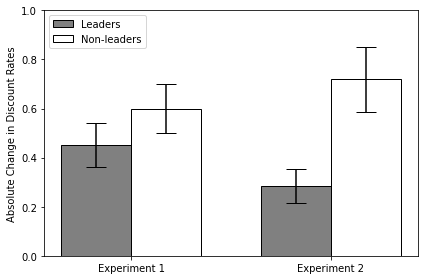

In [65]:
import matplotlib.pyplot as plt

labels = ['Experiment 1', 'Experiment 2']

fig, ax = plt.subplots()

x = np.arange(len(labels))
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, np.array([e1_abs_mean[1], e2_abs_mean[1]]), width, 
    yerr=np.array([e1_abs_std[1]/20**(1/2), e2_abs_std[1]/20**(1/2)]), 
    label="Leaders", align='center', color="gray",
    ecolor='black', capsize=10, edgecolor="black")
rects2 = ax.bar(x + width/2, np.array([e1_abs_mean[0], e2_abs_mean[0]]), width, 
    yerr=np.array([e1_abs_std[0]/40**(1/2), e2_abs_std[0]/40**(1/2)]), 
    label="Non-leaders", align='center', color="white",
    ecolor='black', capsize=10, edgecolor="black")

ax.set_ylabel('Absolute Change in Discount Rates')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.legend()
fig.tight_layout()

plt.savefig("p1_figure1.png", dpi=300)
plt.show()